## การพล็อตตำแหน่งร้านไก่ (Plotting Chicken Locations)

ในขั้นตอนนี้ คุณจะสร้างกราฟแบบกระจาย (scatterplot)  
เพื่อแสดงตำแหน่งของร้านไก่ในเมืองแนชวิลล์ (Nashville)

In [1]:
# Import pandas and matplotlib.pyplot using their customary aliases
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
chickens = pd.read_csv('../../data/raw/Domesticated_Hen_Permits_clean_adjusted_lat_lng.csv')

# Look at the first few rows of the chickens DataFrame
chickens.head()

,Unnamed: 0,permit,city,state,zip,district,date_issued,lat,lng
0,0,288.0,Nashville,TN,37211,30.0,11/26/2014,36.029132,-86.724578
1,1,435.0,Nashville,TN,37211,19.0,05/18/2015,36.069132,-86.754578
2,2,270.0,Nashville,TN,37216,7.0,11/20/2014,36.236134,-86.711204
3,3,249.0,Nashville,TN,37216,25.0,12/29/2014,36.246134,-86.751204
4,4,200.0,Nashville,TN,37221,22.0,12/10/2014,36.029367,-86.935290


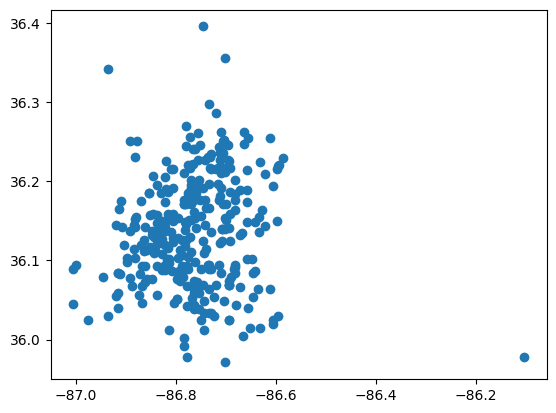

In [2]:
# Plot the locations of all Nashville chicken permits
plt.scatter(x = chickens['lng'], y = chickens['lat'])

# Show the plot
plt.show()

## การสร้าง DataFrame และตรวจสอบเรขาคณิต (Geometry)

มาดูกันว่าเขตการให้บริการ (service districts) ตั้งอยู่ที่ใดในเมืองแนชวิลล์

In [3]:
# Import geopandas
import geopandas as gpd 

# Read in the services district shapefile and look at the first few rows.
service_district = gpd.read_file('../../data/raw/Service District')
service_district.head()


,area_sq_mi,objectid,name,geometry
0,198.0,0.0,Urban Services District,"POLYGON ((-86.68681 36.28671, -86.68706 36.285..."
1,327.0,4.0,General Services District,"MULTIPOLYGON (((-86.56776 36.03424, -86.56783 ..."


In [4]:
# Print the contents of the service districts geometry in the first row
print(service_district.loc[0, 'geometry'])

POLYGON ((-86.68680500011935 36.286705000135036, -86.68706099969657 36.28550299967364, -86.68709498823965 36.28511683351293, -86.68712691935902 36.28475404474551, -86.6871549990252 36.284434999698625, -86.68715025108719 36.28438104319917, -86.68708600011215 36.283651000221596, -86.6870599998375 36.283354000092324, -86.68683200030846 36.280732000269275, -86.68678671280243 36.2804916722591, -86.68668199966068 36.27993600019391, -86.686543000303 36.27920000021985, -86.68641799989246 36.27853199938513, -86.68600744248923 36.27759483150202, -86.6857994235229 36.27711998225582, -86.68482299948184 36.2748910007355, -86.68476799897849 36.27478700083996, -86.68372700043393 36.272817999714924, -86.6832880000829 36.272080000186286, -86.68313199902317 36.27181700012145, -86.68278700024624 36.27108100075766, -86.68257822861736 36.270772097995966, -86.68177585777893 36.2694062861527, -86.68129400001521 36.268569000087204, -86.68085800015712 36.26798600010722, -86.68029000024265 36.26730000044872, -8

## Plotting shapefile polygons

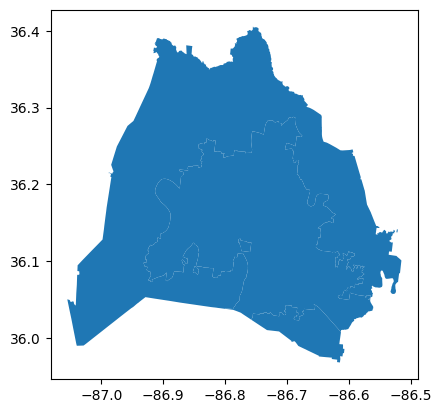

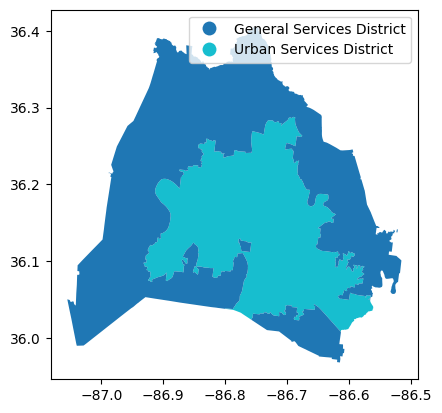

In [5]:
# Plot the Service Districts without any additional arguments
service_district.plot()
plt.show()

# Plot the Service Districts, color them according to name, and show a legend
service_district.plot(column = 'name', legend = True)
plt.show()

## Plotting points over polygons - part 1

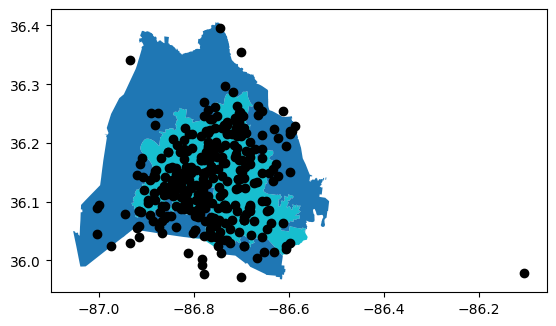

In [6]:
# Plot the service district shapefile
service_district.plot(column='name')

# Add the chicken locations
plt.scatter(x=chickens['lng'], y=chickens['lat'], c = 'black')

# Show the plot
plt.show()

## Plotting points over polygons - part 2

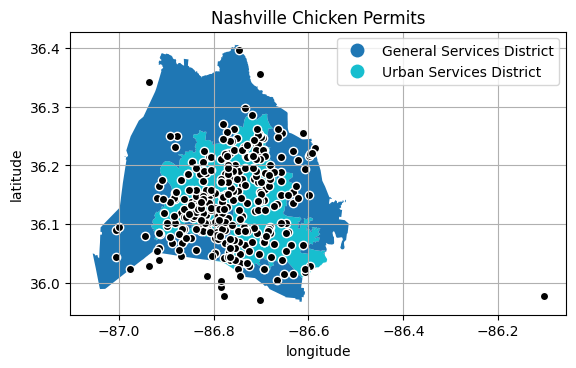

In [7]:
# Plot the service district shapefile
service_district.plot(column='name', legend=True)

# Add the chicken locations
plt.scatter(x=chickens.lng, y=chickens.lat, c='black', edgecolor = 'white')


# Add labels and title
plt.title('Nashville Chicken Permits')
plt.xlabel('longitude')
plt.ylabel('latitude')

# Add grid lines and show the plot
plt.grid()
plt.show()

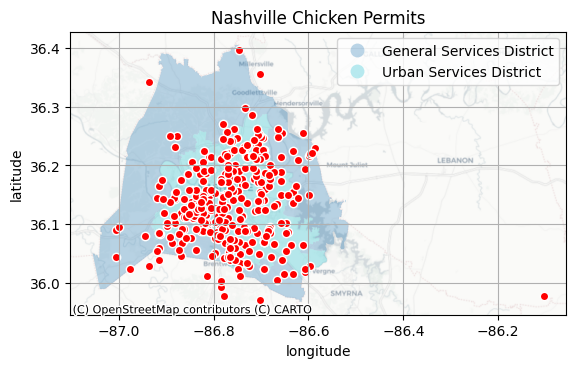

In [12]:
import contextily as ctx

# Plot the service district shapefile
service_district.plot(column='name', legend=True, alpha=0.3)

# Add the chicken locations
plt.scatter(x=chickens['lng'], y=chickens['lat'], c='red', edgecolor = 'white')

ctx.add_basemap(plt.gca(), crs=service_district.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add labels and title
plt.title('Nashville Chicken Permits')
plt.xlabel('longitude')
plt.ylabel('latitude')

# Add grid lines and show the plot
plt.grid()
plt.show()